In [1]:
#Imports 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [5]:
#Lendo o arquivo 

df = pd.read_csv('../data/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
#Checkando quantidade de linhas e colunas

df.shape

(10000, 14)

In [9]:
#Verificando nulos por colunas 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


<Axes: xlabel='Exited', ylabel='count'>

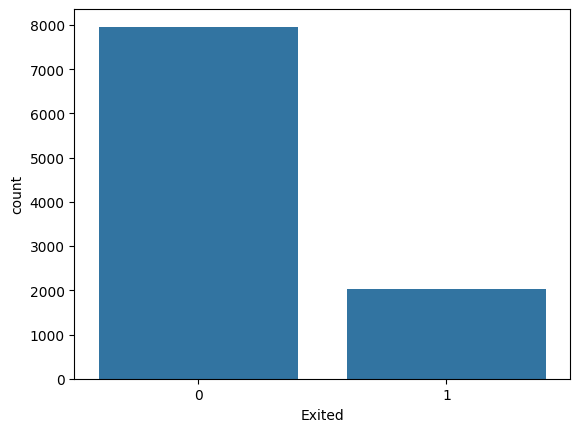

In [12]:
#Avaliando o balanceamento dos dados 

sns.countplot(df,x='Exited')

In [47]:
#Função para comparar a proporção de inadimplentes por alguma variavel

def proportion_inadimplentes(df,column,variavel):

    if column not in df.columns:
        print('Coluna não encontrada')

    else:

        df_agrupado_geography = df.groupby(by=[column,variavel]).size().unstack()
        df_agrupado_geography_proportion = df_agrupado_geography.div(df_agrupado_geography.sum(axis=1),axis=0)
        df_agrupado_geography_proportion = df_agrupado_geography_proportion.reset_index()[[column,1]].rename(columns={1:'Proporção Inadimplentes'})


    #Visualizando graficamente 

    return sns.barplot(df_agrupado_geography_proportion,x=column,y='Proporção Inadimplentes')

<Axes: xlabel='Geography', ylabel='Proporção Inadimplentes'>

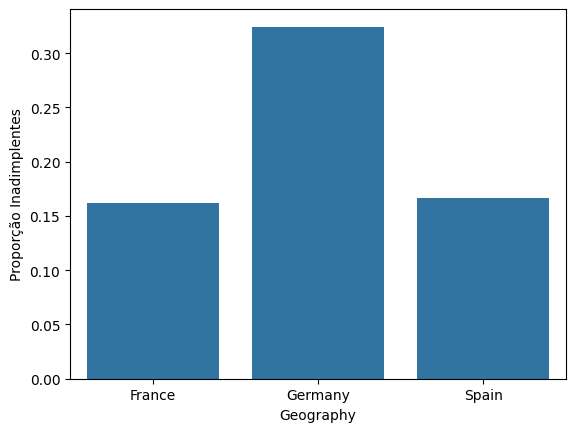

In [48]:
#Proporção de inadimplentes por geolocalização

proportion_inadimplentes(df,'Geography','Exited')

<Axes: xlabel='Gender', ylabel='Proporção Inadimplentes'>

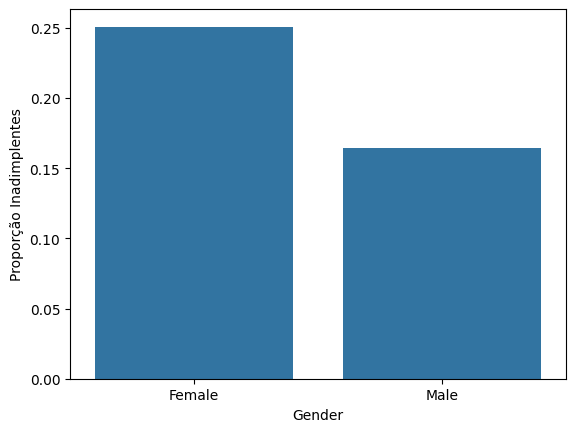

In [49]:
#Proporção de inadimplentes por sexo 

proportion_inadimplentes(df,'Gender','Exited')

In [67]:
#Distribuição das variáveis numéricas 
pd.set_option('display.float_format', lambda x: '%.3f' % x)

df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


<Axes: xlabel='Exited', ylabel='Age'>

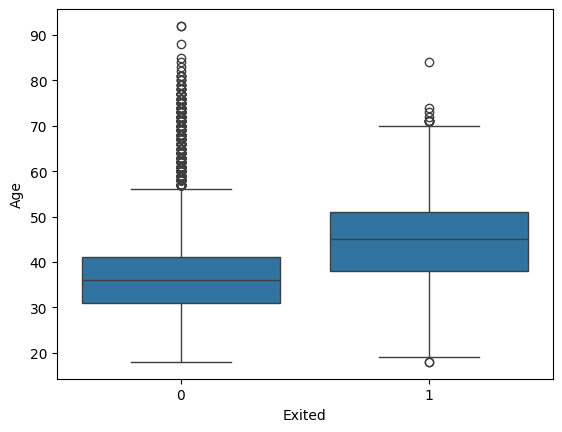

In [68]:
sns.boxplot(df,x='Exited',y='Age')

<Axes: xlabel='Exited', ylabel='Balance'>

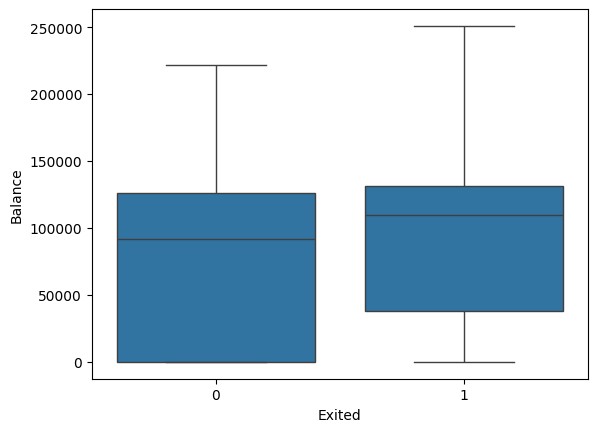

In [71]:
sns.boxplot(df,x='Exited',y='Balance')

<Axes: xlabel='Exited', ylabel='CreditScore'>

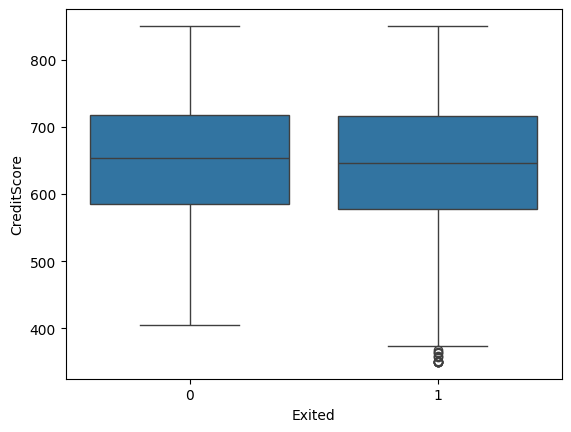

In [73]:
sns.boxplot(df,x='Exited',y='CreditScore')

<Axes: xlabel='Exited', ylabel='Tenure'>

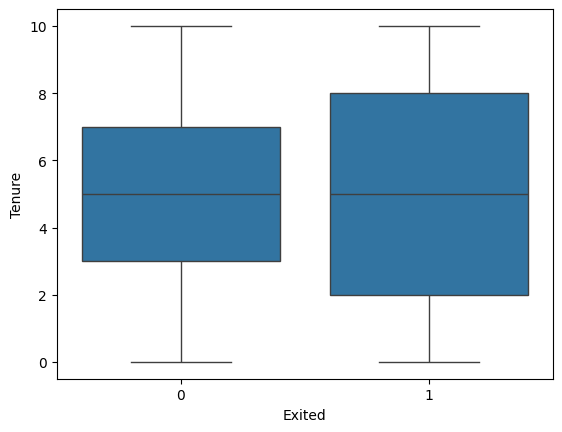

In [74]:
sns.boxplot(df,x='Exited',y='Tenure')

<Axes: xlabel='Exited', ylabel='EstimatedSalary'>

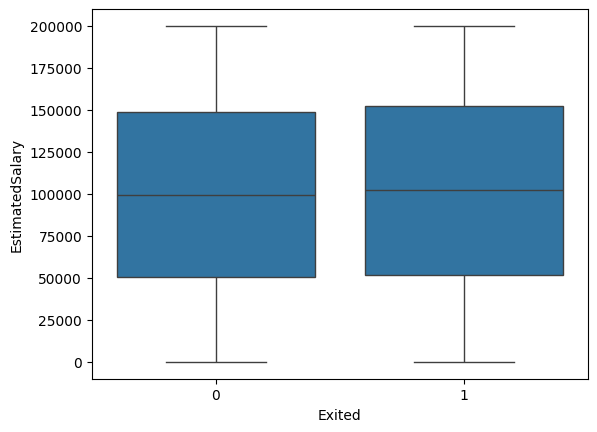

In [75]:
sns.boxplot(df,x='Exited',y='EstimatedSalary')

<Axes: xlabel='Exited', ylabel='NumOfProducts'>

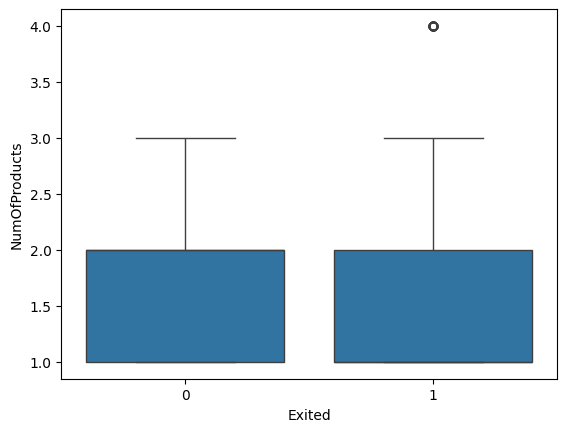

In [76]:
sns.boxplot(df,x='Exited',y='NumOfProducts')

<Axes: xlabel='HasCrCard', ylabel='count'>

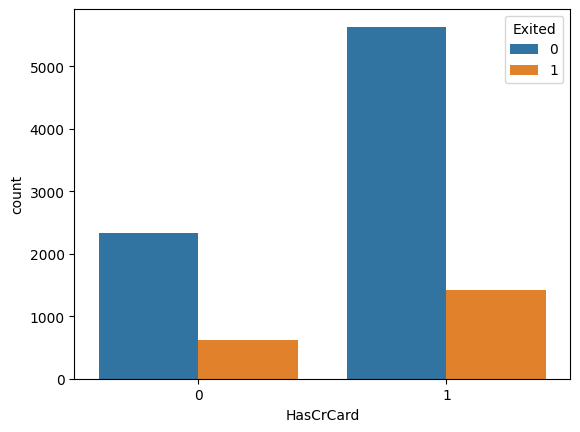

In [79]:
sns.countplot(df,x='HasCrCard',hue='Exited')

In [80]:
df['Balance per Salary'] = df['Balance'] / df['EstimatedSalary']

<Axes: xlabel='EstimatedSalary', ylabel='Count'>

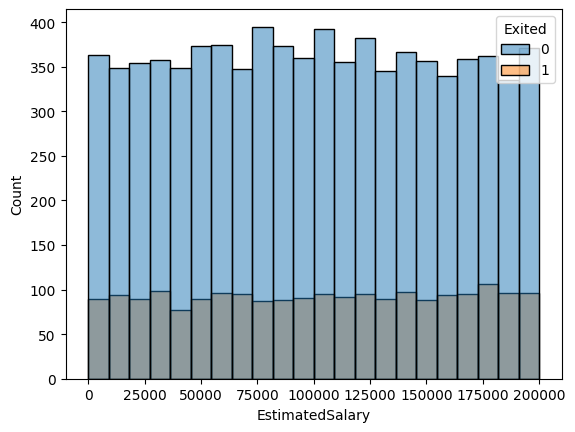

In [93]:
sns.histplot(df,x='EstimatedSalary',hue='Exited')

In [83]:
df['Balance per Salary'].describe()

count   10000.000
mean        3.879
std       108.337
min         0.000
25%         0.000
50%         0.747
75%         1.514
max     10614.655
Name: Balance per Salary, dtype: float64